In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

In [2]:
train=pd.read_csv('Train_aBjfeNk.csv')
test=pd.read_csv('Test_LqhgPWU.csv')

In [3]:
print('Train shape',train.shape)
print('Test shape:',test.shape)

Train shape (8068, 11)
Test shape: (2627, 10)


In [4]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df1=pd.concat([train,test],axis=0)

In [6]:
df=df1

In [7]:
df.shape

(10695, 11)

In [8]:
df.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience
0,22,No,4.0,Male,No,462809,Healthcare,D,Low,Cat_4,1.0
1,38,Yes,3.0,Female,Yes,462643,Engineer,A,Average,Cat_4,NaN
2,67,Yes,1.0,Female,Yes,466315,Engineer,B,Low,Cat_6,1.0
3,67,Yes,2.0,Male,Yes,461735,Lawyer,B,High,Cat_6,0.0
4,40,Yes,6.0,Female,Yes,462669,Entertainment,A,High,Cat_6,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
Age                10695 non-null int64
Ever_Married       10505 non-null object
Family_Size        10247 non-null float64
Gender             10695 non-null object
Graduated          10593 non-null object
ID                 10695 non-null int64
Profession         10533 non-null object
Segmentation       8068 non-null object
Spending_Score     10695 non-null object
Var_1              10587 non-null object
Work_Experience    9597 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10695.0,43.511828,16.774158,18.0,30.0,41.0,53.0,89.0
Family_Size,10247.0,2.844052,1.536427,1.0,2.0,3.0,4.0,9.0
ID,10695.0,463468.088640,2600.966411,458982.0,461220.5,463451.0,465733.5,467974.0
Work_Experience,9597.0,2.619777,3.390790,0.0,0.0,1.0,4.0,14.0


In [11]:
df.isna().sum()

Age                   0
Ever_Married        190
Family_Size         448
Gender                0
Graduated           102
ID                    0
Profession          162
Segmentation       2627
Spending_Score        0
Var_1               108
Work_Experience    1098
dtype: int64

In [12]:
df.corr()

,Age,Family_Size,ID,Work_Experience
Age,1.000000,-0.281725,-0.009562,-0.189653
Family_Size,-0.281725,1.000000,0.014095,-0.065163
ID,-0.009562,0.014095,1.000000,-0.029351
Work_Experience,-0.189653,-0.065163,-0.029351,1.000000


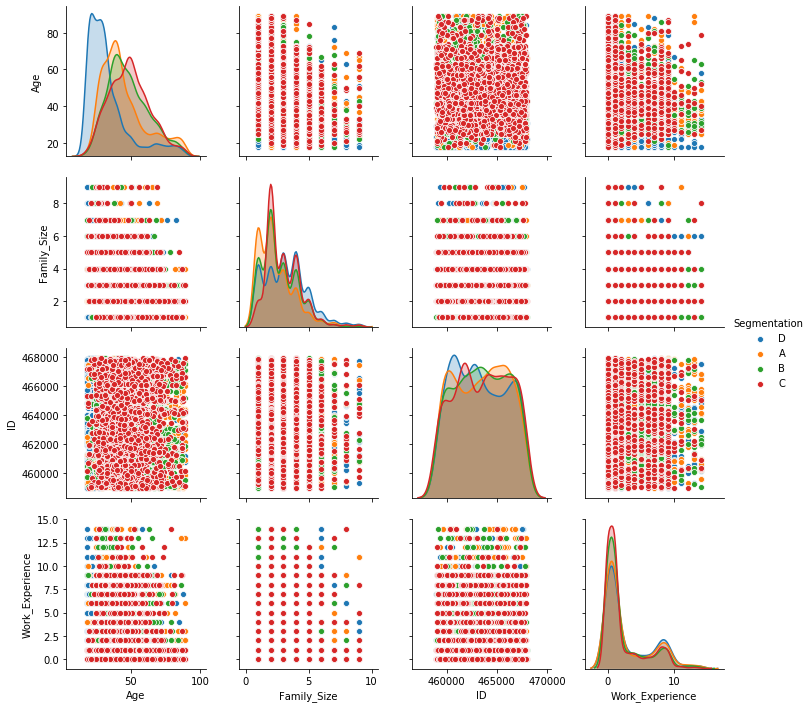

In [13]:
sns.pairplot(df,diag_kind='kde',hue='Segmentation')

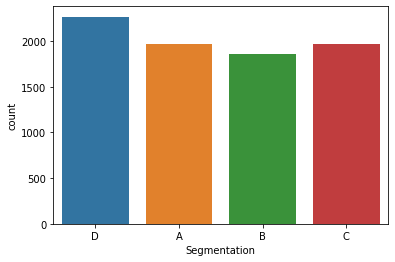

In [14]:
sns.countplot(df['Segmentation'])

In [15]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [16]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession', 'Segmentation', 'Spending_Score', 'Var_1',
       'Work_Experience'],
      dtype='object')

In [88]:
df.duplicated().sum()

0

In [89]:
df['ID'].duplicated().sum()

2332

In [163]:
df.shape

(10695, 12)

In [165]:
df_l=df['ID'][df['ID'].duplicated(keep=False)]

In [170]:
df_l=df_l.drop_duplicates(keep='last')

## Age

In [17]:
df.Age.value_counts()

35    321
42    320
37    304
43    301
40    300
33    298
28    297
27    295
38    288
25    288
32    287
41    282
39    280
36    277
31    275
30    272
26    268
29    244
50    234
46    233
47    217
51    214
48    213
52    208
49    208
45    205
53    199
22    184
19    184
20    178
     ... 
55    123
57    120
62    116
63    110
58    103
65     95
69     92
66     91
68     86
70     85
72     82
73     80
67     78
71     76
83     53
81     49
79     49
86     47
89     46
82     45
88     44
84     44
87     44
74     42
77     39
75     37
78     36
76     36
80     33
85     32
Name: Age, Length: 67, dtype: int64

In [18]:
def desc_stat(col):
    print("Mean  is {} ".format(np.mean(col)))
    print("Median  is {} ".format(np.median(col)))
    print("Std is {} ".format(np.std(col)))
    print("NA values is {} ".format(col.isna().sum()))
    print('Skewness is {}'.format(skew(col)))
    sns.boxplot(col)

In [19]:
## Outlier Function

In [20]:
np.percentile(df['Age'],[0,25,75,100])

array([18., 30., 53., 89.])

In [21]:
def outlier_det(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    print('Q1 is ',Q1)
    print('Q3 is ',Q3)
    print('IQR is ',IQR)
    Lower_whisker=Q1-(1.5*IQR)
    Upper_whisker=Q3+(1.5*IQR)
    print('Mean value is ',col.mean())
    print('Media value is',col.median())
    sns.boxplot(col)    
    print("Lower whisker is {} and upper whisker is {} \n".format(Lower_whisker,Upper_whisker))
    print("Outlier values are :")
    print((col[(col <Lower_whisker)|(col >Upper_whisker)].values),"\n")
    print("No of outlier:",len(col[(col <Lower_whisker)|(col >Upper_whisker)].values))

Q1 is  30.0
Q3 is  53.0
IQR is  23.0
Mean value is  43.51182795698925
Media value is 41.0
Lower whisker is -4.5 and upper whisker is 87.5 

Outlier values are :
[89 89 88 88 88 89 88 89 88 89 89 89 88 88 88 88 88 88 89 88 89 88 88 88
 89 89 88 88 89 89 88 89 89 89 89 89 89 88 89 89 88 89 89 88 89 88 89 89
 89 88 88 88 88 89 88 89 88 89 88 88 89 88 89 89 88 89 89 88 88 88 89 88
 89 89 88 88 88 88 88 89 89 89 89 88 89 88 89 89 89 88] 

No of outlier: 90


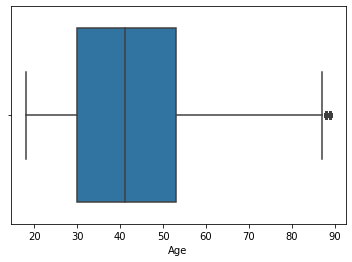

In [22]:
outlier_det(df['Age'])

In [23]:
(df[df['Age']==89])[['Age','Segmentation']].Segmentation.value_counts()

A    17
C     8
B     6
D     5
Name: Segmentation, dtype: int64

In [24]:
(df[df['Age']>87])[['Age','Segmentation']].Segmentation.value_counts()

A    28
C    16
D    14
B    13
Name: Segmentation, dtype: int64

##### There is no impact on target by outliers for this feature

In [25]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession', 'Segmentation', 'Spending_Score', 'Var_1',
       'Work_Experience'],
      dtype='object')

## Ever_Married

In [26]:
df['Ever_Married'].value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

In [27]:
df['Ever_Married'].isna().sum()

190

In [28]:
(df[df['Ever_Married']=='Yes'].Segmentation.value_counts())

C    1549
B    1348
A    1137
D     609
Name: Segmentation, dtype: int64

In [29]:
df[df['Ever_Married']=='No'].Segmentation.value_counts()

D    1607
A     801
B     479
C     398
Name: Segmentation, dtype: int64

#### **Unmarried ppl mostly belongs to class D

In [30]:
df['Ever_Married'].fillna('Yes',inplace=True)

In [31]:
df['Ever_Married'].isna().sum()

0

In [32]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession', 'Segmentation', 'Spending_Score', 'Var_1',
       'Work_Experience'],
      dtype='object')

## Family size

In [33]:
df['Family_Size'].value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [34]:
df.Family_Size.isna().sum()

448

In [35]:
df.Family_Size.fillna(float(2.0),inplace=True)

Q1 is  2.0
Q3 is  4.0
IQR is  2.0
Mean value is  2.8086956521739133
Media value is 2.0
Lower whisker is -1.0 and upper whisker is 7.0 

Outlier values are :
[8. 9. 8. 8. 8. 8. 8. 9. 8. 8. 8. 8. 9. 9. 9. 8. 8. 9. 9. 8. 9. 8. 9. 9.
 9. 9. 9. 9. 8. 8. 9. 9. 9. 8. 8. 8. 8. 9. 8. 8. 8. 8. 9. 8. 8. 8. 8. 8.
 9. 9. 8. 9. 9. 9. 8. 8. 8. 9. 8. 9. 8. 8. 9. 8. 8. 9. 8. 8. 9. 9. 8. 8.
 8. 8. 8. 9. 9. 9. 8. 8. 9. 9. 9. 8. 9. 9. 9. 9. 9. 8. 9. 9. 8. 9. 8. 8.
 9. 9. 8. 9. 9. 9. 8. 8. 9. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9. 8. 9. 9. 8. 8.
 8. 9. 8. 9. 8.] 

No of outlier: 125


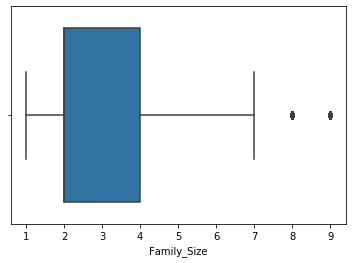

In [36]:
outlier_det(df['Family_Size'])

In [37]:
df[df['Family_Size']>7]['Segmentation'].value_counts()

D    43
C    24
A    18
B     9
Name: Segmentation, dtype: int64

#### Unmarried ppl and larger families mostly belonsg to class D

In [38]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession', 'Segmentation', 'Spending_Score', 'Var_1',
       'Work_Experience'],
      dtype='object')

## Gender

In [39]:
df['Gender'].value_counts()

Male      5841
Female    4854
Name: Gender, dtype: int64

In [40]:
df['Gender'].isna().sum()

0

In [41]:
df[df['Gender']=='Male']['Segmentation'].value_counts()

D    1309
A    1063
C    1048
B     997
Name: Segmentation, dtype: int64

In [42]:
df[df['Gender']=='Female']['Segmentation'].value_counts()

D    959
C    922
A    909
B    861
Name: Segmentation, dtype: int64

## Graduated

In [43]:
df['Graduated'].value_counts()

Yes    6570
No     4023
Name: Graduated, dtype: int64

In [44]:
df['Graduated'].isna().sum()

102

In [45]:
df['Graduated'].fillna('Yes',inplace=True)

In [46]:
df['Graduated'].isna().sum()

0

## Profession

In [47]:
df['Profession'].value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

In [48]:
df['Profession'].isna().sum()

162

In [49]:
df['Profession'].mode()[0]

'Artist'

In [50]:
df['Profession'].fillna(df['Profession'].mode()[0],inplace=True)

In [51]:
df[df['Profession']=='Artist']['Segmentation'].value_counts()

C    1083
B     778
A     591
D     188
Name: Segmentation, dtype: int64

In [52]:
df.groupby(df['Segmentation'])['Profession'].value_counts()

Segmentation  Profession   
A             Artist            591
              Entertainment     365
              Engineer          259
              Doctor            199
              Lawyer            197
              Executive         125
              Healthcare        106
              Homemaker          73
              Marketing          57
B             Artist            778
              Entertainment     221
              Engineer          189
              Executive         183
              Lawyer            158
              Doctor            143
              Healthcare        101
              Homemaker          55
              Marketing          30
C             Artist           1083
              Executive         175
              Entertainment     148
              Healthcare        146
              Doctor            140
              Lawyer            140
              Engineer           75
              Marketing          35
              Homemaker          28


In [53]:
df[df['Segmentation']=='D']['Profession'].value_counts()

Healthcare       979
Entertainment    215
Doctor           206
Artist           188
Engineer         176
Marketing        170
Lawyer           128
Executive        116
Homemaker         90
Name: Profession, dtype: int64

In [54]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID',
       'Profession', 'Segmentation', 'Spending_Score', 'Var_1',
       'Work_Experience'],
      dtype='object')

## Spending Score

In [55]:
df['Spending_Score'].value_counts()

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

In [56]:
df['Spending_Score'].isna().sum()

0

In [57]:
df.groupby(df['Segmentation'])['Spending_Score'].value_counts()

Segmentation  Spending_Score
A             Low               1358
              Average            343
              High               271
B             Low                884
              Average            590
              High               384
C             Average            903
              Low                662
              High               405
D             Low               1974
              High               156
              Average            138
Name: Spending_Score, dtype: int64

## Var_1

In [58]:
df['Var_1'].value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [59]:
df['Var_1'].isna().sum()

108

In [60]:
len(df)

10695

In [61]:
(df['Var_1'].value_counts()/len(df))*100

Cat_6    64.609631
Cat_4    13.791491
Cat_3    10.182328
Cat_2     5.264142
Cat_7     2.515194
Cat_1     1.561477
Cat_5     1.065919
Name: Var_1, dtype: float64

In [62]:
df.groupby(df['Segmentation'])['Var_1'].value_counts()

Segmentation  Var_1
A             Cat_6    1213
              Cat_4     333
              Cat_3     223
              Cat_2      83
              Cat_7      51
              Cat_1      31
              Cat_5      19
B             Cat_6    1232
              Cat_4     232
              Cat_3     186
              Cat_2     106
              Cat_7      43
              Cat_1      26
              Cat_5      20
C             Cat_6    1496
              Cat_3     154
              Cat_4     109
              Cat_2      99
              Cat_7      47
              Cat_1      26
              Cat_5      18
D             Cat_6    1297
              Cat_4     415
              Cat_3     259
              Cat_2     134
              Cat_7      62
              Cat_1      50
              Cat_5      28
Name: Var_1, dtype: int64

#### Cat_6 has 65% of data...hence it is better to drop this feature

In [63]:
df['Work_Experience'].value_counts()

1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [64]:
df['Work_Experience'].isna().sum()

1098

In [65]:
round(df.groupby(df['Segmentation'])['Work_Experience'].mean(),4)

Segmentation
A    2.8746
B    2.3782
C    2.2408
D    3.0217
Name: Work_Experience, dtype: float64

In [66]:
df['Work_Experience'].mean()

2.619777013650099

In [67]:
df['Work_Experience1']=df.groupby(df['Segmentation'])['Work_Experience'].apply(lambda x: x.fillna(round(x.mean(),0)))

In [68]:
df['Work_Experience1'].isna().sum()

0

In [69]:
df.groupby(df['Segmentation'])['Work_Experience1'].mean()

Segmentation
A    2.886917
B    2.339074
C    2.221827
D    3.018959
Name: Work_Experience1, dtype: float64

In [70]:
df['Work_Experience'].value_counts()

1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [71]:
df['Work_Experience1'].value_counts()

1.0     3149
0.0     3066
3.0      983
2.0      828
9.0      618
8.0      608
4.0      340
6.0      276
7.0      259
5.0      250
10.0      68
11.0      65
12.0      64
14.0      61
13.0      60
Name: Work_Experience1, dtype: int64

Q1 is  0.0
Q3 is  3.0
IQR is  3.0
Mean value is  2.62328190743338
Media value is 1.0
Lower whisker is -4.5 and upper whisker is 7.5 

Outlier values are :
[ 9. 12. 13. ...  9.  8.  9.] 

No of outlier: 1544


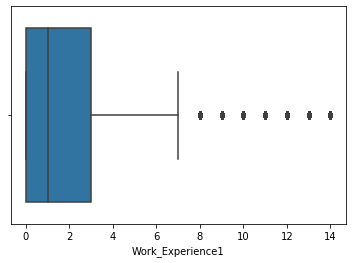

In [72]:
outlier_det(df['Work_Experience1'])

In [113]:
train_new=df[df['Segmentation'].notna()]
test_new=df[df['Segmentation'].isna()]

In [114]:
train_new['Segmentation']=train_new['Segmentation'].replace({'A':1,'B':2,"C":3,'D':4}).astype(int)

In [115]:
train_new.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,Work_Experience1
0,22,No,4.0,Male,No,462809,Healthcare,4,Low,Cat_4,1.0,1.0
1,38,Yes,3.0,Female,Yes,462643,Engineer,1,Average,Cat_4,NaN,3.0
2,67,Yes,1.0,Female,Yes,466315,Engineer,2,Low,Cat_6,1.0,1.0
3,67,Yes,2.0,Male,Yes,461735,Lawyer,2,High,Cat_6,0.0,0.0
4,40,Yes,6.0,Female,Yes,462669,Entertainment,1,High,Cat_6,NaN,3.0


In [116]:
num_col=train_new.select_dtypes(include=np.number).drop(columns=['ID','Work_Experience'])

In [117]:
cat_col=train_new.select_dtypes(exclude=np.number).drop(columns=['Var_1'])

In [118]:
cat_col.head()

,Ever_Married,Gender,Graduated,Profession,Spending_Score
0,No,Male,No,Healthcare,Low
1,Yes,Female,Yes,Engineer,Average
2,Yes,Female,Yes,Engineer,Low
3,Yes,Male,Yes,Lawyer,High
4,Yes,Female,Yes,Entertainment,High


In [119]:
cat_col_pr=pd.get_dummies(cat_col,drop_first=True)

In [120]:
train_df=pd.concat([num_col,cat_col_pr],axis=1)

In [121]:
train_df.head()

,Age,Family_Size,Segmentation,Work_Experience1,Ever_Married_Yes,Gender_Male,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,22,4.0,4,1.0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,38,3.0,1,3.0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,67,1.0,2,1.0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,67,2.0,2,0.0,1,1,1,0,0,0,0,0,0,1,0,1,0
4,40,6.0,1,3.0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [122]:
num_col=test_new.select_dtypes(include=np.number).drop(columns=['ID','Work_Experience'])

In [123]:
cat_col=test_new.select_dtypes(exclude=np.number).drop(columns=['Var_1','Segmentation'])

In [124]:
cat_col_pr=pd.get_dummies(cat_col,drop_first=True)

In [125]:
test_df=pd.concat([num_col,cat_col_pr],axis=1)

In [127]:
train_df.shape,test_df.shape

((8068, 17), (2627, 16))

## X and Y split

In [82]:
X=train_df[['Age', 'Family_Size', 'Work_Experience1',
       'Ever_Married_Yes', 'Gender_Male', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low']]

In [83]:
y=train_df['Segmentation']

## Train test split

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.cross_validation import cross_val_score

C:\Users\ganesh duke\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [85]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.20,
                                                  random_state=10)

In [90]:
def model_sel(X,y,model):
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.20,
                                                  random_state=10)
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    print("Train Accuracy :",accuracy_score(train_y,train_pred))
    print("Test Accuracy :",accuracy_score(test_y,test_pred))
    print('**************\n')
    cv=cross_val_score(model,X,y,cv=5)
    print("Cross Val score : ",cv.mean(),"\n")
    print("*********\n")
#     print("Train F1 score :",f1_score(train_y,train_pred))
#     print("Test F1 score :",f1_score(test_y,test_pred))
#     print('**************\n')
#     print("Train Confusion Matirx :\n",confusion_matrix(train_y,train_pred))
#     print("Test Confusion Matirx n:\n",confusion_matrix(test_y,test_pred))
#     print("************\n")
#     print("Train :\n",classification_report(train_y,train_pred),'\n')
#     print("Test :\n",classification_report(test_y,test_pred))
    

In [91]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
model_sel(X,y,log)

Train Accuracy : 0.5103811589711806
Test Accuracy : 0.5154894671623296
**************

Cross Val score :  0.5052028519630228 

*********



In [ ]:
##Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [93]:
scale_x=scale.fit_transform(X)

In [94]:
model_sel(scale_x,y,log)

Train Accuracy : 0.5105361016423923
Test Accuracy : 0.5154894671623296
**************

Cross Val score :  0.506566002658083 

*********



In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=8)
model_sel(X,y,rfc)

Train Accuracy : 0.5870777812209482
Test Accuracy : 0.523543990086741
**************

Cross Val score :  0.5278867441823294 

*********



In [104]:
model_sel(scale_x,y,rfc)

Train Accuracy : 0.5873876665633716
Test Accuracy : 0.5272614622057001
**************

Cross Val score :  0.5290034476484545 

*********



In [130]:
test_pred=rfc.predict(test_df)

In [133]:
test_pred=pd.DataFrame(test_pred,columns=["Segmentation"],dtype=int)

In [134]:
result=pd.concat([test_new["ID"],test_pred],axis=1)

In [136]:
result.Segmentation.value_counts()

1    2209
4     418
Name: Segmentation, dtype: int64

In [138]:
result['Segmentation'].replace({1:'A',4:'D'},inplace=True)

In [139]:
result.head()

,ID,Segmentation
0,458989,A
1,458994,D
2,458996,A
3,459000,A
4,459001,A


In [140]:
result.to_csv("rfc.csv",index=False)

In [142]:
train_df.columns

Index(['Age', 'Family_Size', 'Segmentation', 'Work_Experience1',
       'Ever_Married_Yes', 'Gender_Male', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low'],
      dtype='object')

In [143]:
X=train_df[['Age', 'Family_Size', 'Work_Experience1',
       'Ever_Married_Yes', 'Gender_Male', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low']]

In [144]:
y=train_df['Segmentation']

In [202]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=7)

In [203]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
test_pred=rfc.predict(test_df)

In [205]:
test_pred=pd.DataFrame(test_pred,columns=["Segmentation"],dtype=int)

In [206]:
result2=pd.concat([test_new["ID"],test_pred],axis=1)

In [207]:
result2['Segmentation'].replace({1:'A',4:'D',3:'C',2:'B'},inplace=True)

In [208]:
result2.head()

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,A
3,459000,B
4,459001,D


In [209]:
result2.Segmentation.value_counts()

D    806
A    799
C    630
B    392
Name: Segmentation, dtype: int64

In [210]:
# result2.to_csv("rfc3.csv",index=False)

In [211]:
result2.shape

(2627, 2)

In [212]:
common_id=np.intersect1d(train.ID,test.ID)


In [213]:
common_id.shape

(2332,)

In [214]:
submission=test[['ID']]

In [215]:
submission.head()

,ID
0,458989
1,458994
2,458996
3,459000
4,459001


In [216]:
submission.shape

(2627, 1)

In [217]:
submission['Segmentation']=result2['Segmentation']


In [218]:
submission.head()

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,A
3,459000,B
4,459001,D


In [219]:
submission.set_index('ID',inplace=True)


In [220]:
2332/2627

0.8877046060144652

In [221]:
submission.head(3)

,Segmentation
ID,
458989,A
458994,C
458996,A


In [222]:
np.array(train.set_index('ID').loc[common_id,'Segmentation'])

array(['B', 'C', 'A', ..., 'D', 'A', 'B'], dtype=object)

In [223]:
submission.loc[common_id,'Segmentation']=np.array(train.set_index('ID').loc[common_id,'Segmentation'])


In [224]:
submission.reset_index(inplace=True)


In [225]:
submission.to_csv('Target.csv',index=False)


In [187]:
submission

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C
5,459003,C
6,459005,B
7,459008,B
8,459013,C
9,459014,D
